<span style="color:blue">DAY-14</span>

<span style="color:red;"><b> "Simple Project Using AI-NETFLIX CLUSTERRING" </b></span>

In [1]:
# Used for data manipulation and analysis
import pandas as pd  

# Used for numerical operations on arrays and matrices
import numpy as np  

# Used to create visualizations like line plots, bar charts, scatter plots, etc.
import matplotlib.pyplot as plt  

# Built on top of matplotlib, used for making attractive statistical plots
import seaborn as sns  

# Standardizes features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler  

# Unsupervised clustering algorithm to group similar data points
from sklearn.cluster import KMeans  

# Reduces high-dimensional data to 2 or 3 components for visualization
from sklearn.decomposition import PCA  


In [2]:
df = pd.read_csv("netflix_titles.csv")
print(df.shape)
df.head()


(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Drop the columns 'show_id' and 'description' from the DataFrame
# These columns are not useful for clustering (show_id is just an ID, description is text)
df.drop(['show_id', 'description'], axis=1, inplace=True)


In [4]:
# Remove all rows that have missing (null) values
# This helps keep the data clean and prevents errors during modeling
df.dropna(inplace=True)


In [5]:
# Convert the 'date_added' column from string to actual datetime format
# This allows us to extract meaningful time-based features like year/month later
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')


In [6]:
# Extract just the year part from the 'date_added' datetime column
# Create a new column 'year_added' that stores the year when the content was added to Netflix
df['year_added'] = df['date_added'].dt.year


In [7]:
# Convert categorical columns into numerical ones using One-Hot Encoding
# 'type', 'rating', 'listed_in', 'country' are categorical — we can't feed them directly into ML algorithms
# get_dummies() creates new columns for each unique category and fills them with 0s and 1s (binary encoding)
df_encoded = pd.get_dummies(df, columns=['type', 'rating', 'listed_in', 'country'], drop_first=True)


In [8]:
features = df_encoded.select_dtypes(include=[np.number])  # only numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


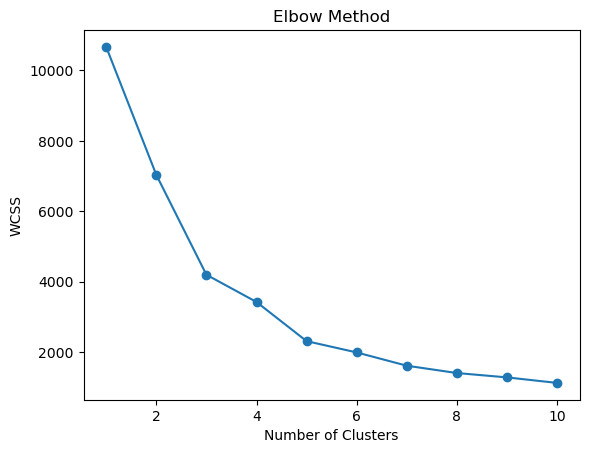

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [10]:
k = 4  # or the value you chose
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)


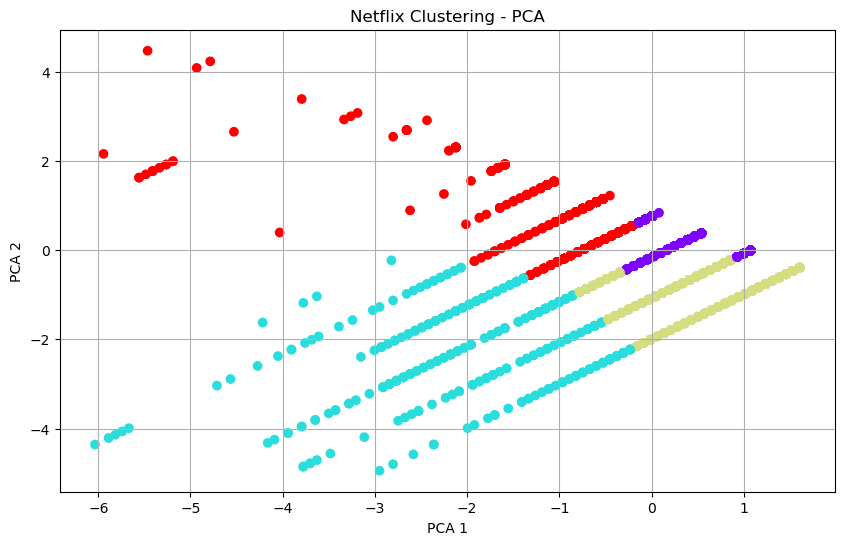

In [11]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['cluster'], cmap='rainbow')
plt.title('Netflix Clustering - PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


In [12]:
df_clean = df.select_dtypes(include=[np.number])  # only numeric
df_clean['cluster'] = df['cluster']  # make sure 'cluster' is still there
df_clean.groupby('cluster').mean()


,release_year,year_added
cluster,,
0,2017.461159,2019.017961
1,1985.534177,2019.144304
2,2012.264456,2020.432537
3,2013.348903,2016.959660


In [13]:
df['cluster'].value_counts()


cluster
0    2227
3    1413
2    1297
1     395
Name: count, dtype: int64

In [14]:
pip install streamlit


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
import streamlit as st
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

st.title("🎬 Netflix Clustering App")

df = pd.read_csv("netflix_titles.csv")
st.write("Raw Data", df.head())

# Add your preprocessing, clustering, and PCA here
# Add charts with st.pyplot()


2025-07-28 12:33:54.018 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:33:54.725 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-28 12:33:54.727 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:33:54.814 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:33:54.815 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:33:54.815 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:33:54.817 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:33:54.848 Thread 'MainThread': mi